# Rain

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import statsmodels.api as sm

In [193]:
#Load the dataset
df = pd.read_csv('weather.csv')


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [195]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [196]:
df['MaxTemp'].isnull().sum()

np.int64(1261)

In [197]:
# Choose the column
column_name = 'MaxTemp'

In [198]:
# Drop NA values to avoid issues with calculations
data = df['MaxTemp'].dropna()

In [199]:
data.isnull().sum()

np.int64(0)

# Mean

In [200]:
mean_value = data.mean()
print(f"Mean: {mean_value}")

Mean: 23.22134827564685


# Median

In [201]:
median_value = data.median()
print(f"Median: {median_value}")

Median: 22.6


# Mode

In [202]:
mode_value = data.mode()
print(f"Mode: {mode_value}")

Mode: 0    20.0
Name: MaxTemp, dtype: float64


# Quartiles and Interquartile Range(IQR)

In [203]:
# Quartiles and Interquartile Range (IQR) 

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

Q1 (25th percentile): 17.9
Q3 (75th percentile): 28.2
IQR: 10.3


# Calculate quantiles

In [204]:

quantiles = data.quantile([0.25, 0.5, 0.75])
print("Quantiles:")
print(quantiles)


Quantiles:
0.25    17.9
0.50    22.6
0.75    28.2
Name: MaxTemp, dtype: float64


# Quantile Plot

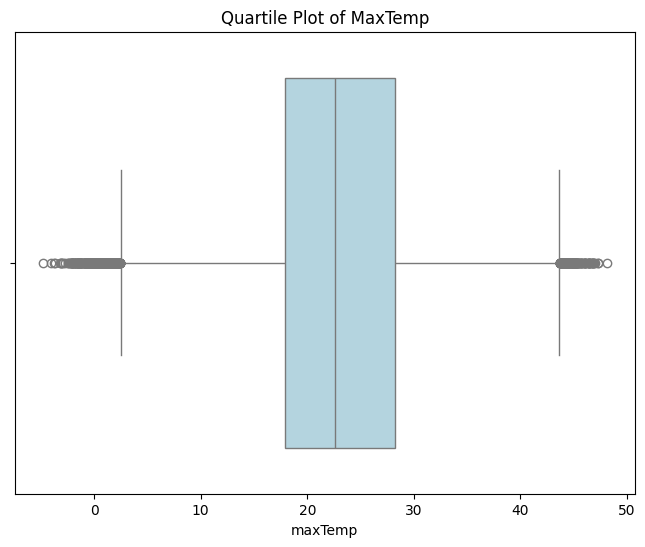

In [205]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data, color='lightblue')
plt.title(f'Quartile Plot of {'MaxTemp'}')
plt.xlabel('maxTemp')
plt.show()

# Q-Q Plot

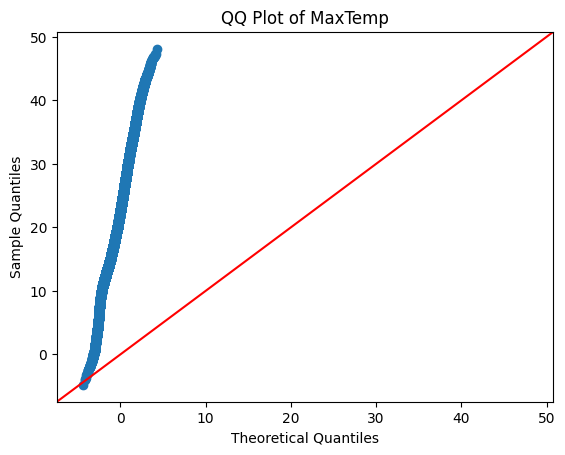

In [206]:
# Quartile-Quartile (QQ) Plot
sm.qqplot(data, line='45')
plt.title(f'QQ Plot of {'MaxTemp'}')
plt.show()

# Standard Deviation

In [207]:
std_dev = data.std()
print(f"Standard Deviation: {std_dev}")

Standard Deviation: 7.119048845979133


 # Variance

In [208]:
# Variance
variance_value = data.var()
print(f"Variance: {variance_value}")

Variance: 50.680856471436826


# Normalization

In [209]:
normalized_column = (data - data.min()) / (data.max() - data.min())
print(f"Normalized Column:\n{normalized_column}")

Normalized Column:
0         0.523629
1         0.565217
2         0.576560
3         0.620038
4         0.701323
            ...   
145454    0.502836
145455    0.533081
145456    0.568998
145457    0.599244
145458    0.601134
Name: MaxTemp, Length: 144199, dtype: float64


# Box Plot

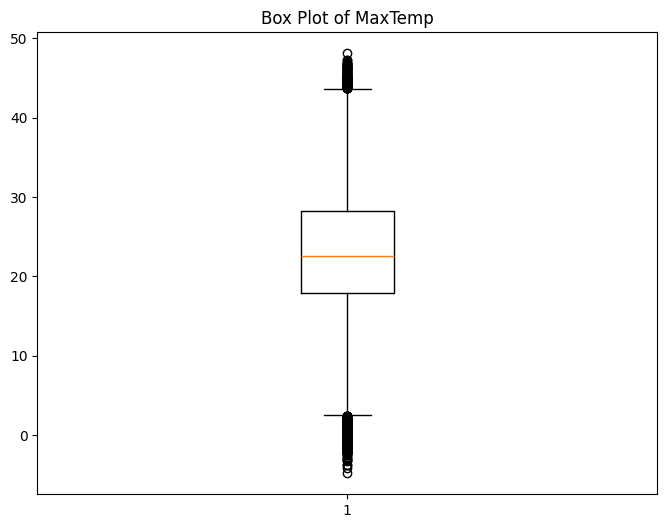

In [210]:
plt.figure(figsize=(8, 6))
plt.boxplot(data)
plt.title(f'Box Plot of {'MaxTemp'}')
plt.show()

# Calculate skewness

In [211]:
skewness_value = skew(df['MaxTemp'].dropna())
print(f"Skewness: {skewness_value}")


Skewness: 0.220837050892215


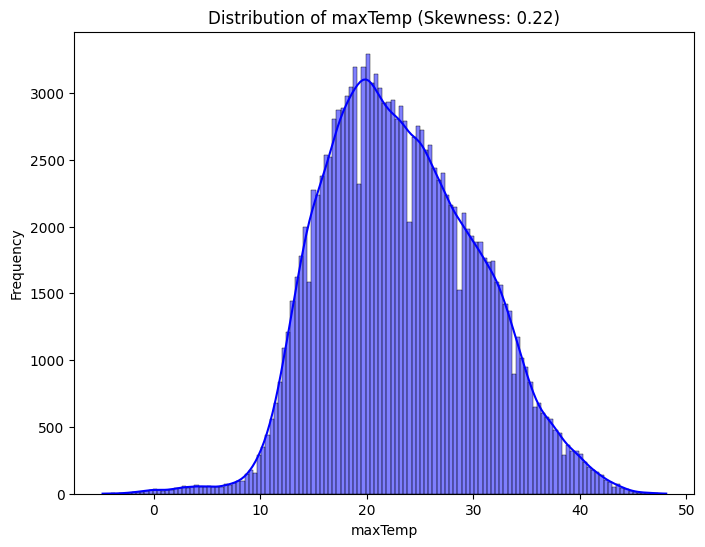

In [212]:
plt.figure(figsize=(8, 6))
sns.histplot(data, kde=True, color='blue')
plt.title(f'Distribution of maxTemp (Skewness: {skewness_value:.2f})')
plt.xlabel('maxTemp')
plt.ylabel('Frequency')
plt.show()

# Plot histogram to visualize

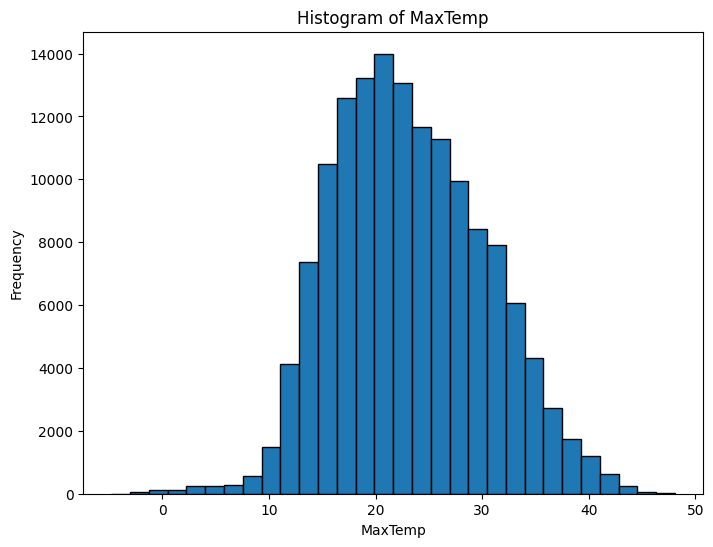

In [213]:
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, edgecolor='black')
plt.title(f'Histogram of {'MaxTemp'}')
plt.xlabel('MaxTemp')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot (against index)

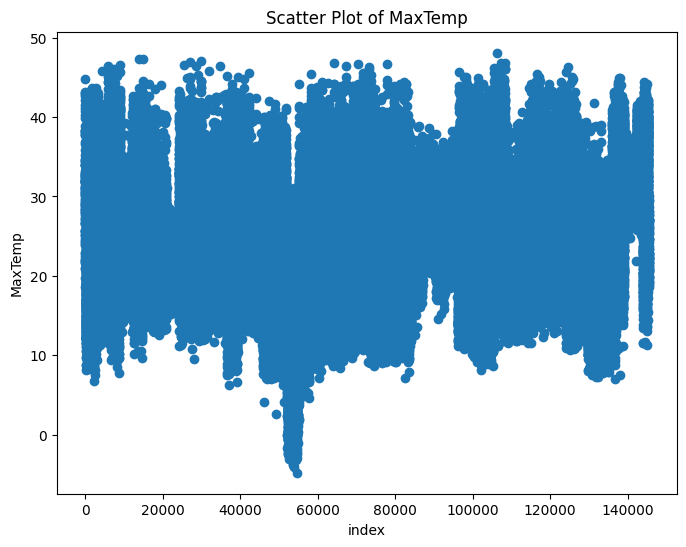

In [214]:
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data)
plt.title(f'Scatter Plot of {'MaxTemp'}')
plt.xlabel('index')
plt.ylabel('MaxTemp')
plt.show()
